Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
 # import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv('C:\\Users\\amind\\Downloads\\crime_data.csv')  
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# Normalize heterogenous numerical data 
data_norm=pd.DataFrame(normalize(data),columns=data.columns)
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


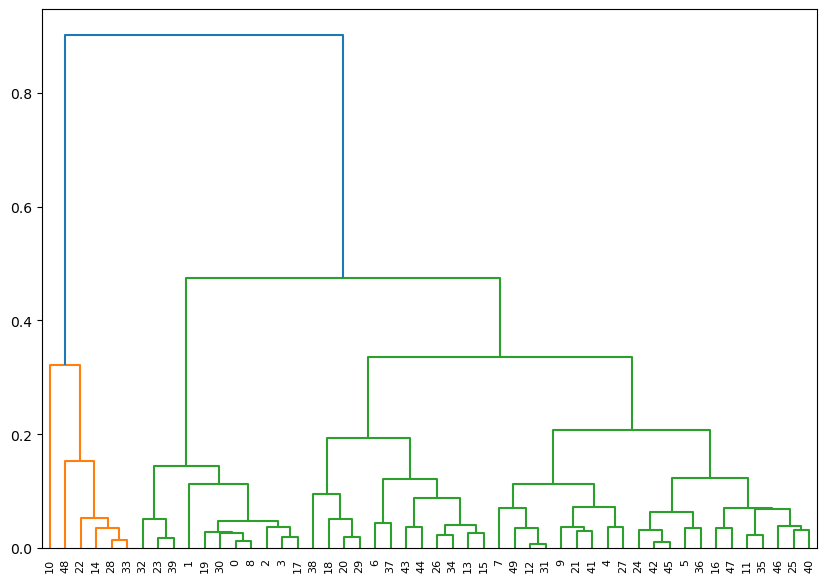

In [6]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data_norm,'complete'))

In [7]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [8]:
y=pd.DataFrame(hclusters.fit_predict(data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
3    12
1    12
2     5
4     1
Name: clustersid, dtype: int64

In [9]:
# Adding clusters to dataset
data['clustersid']=hclusters.labels_
data

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [10]:
data.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


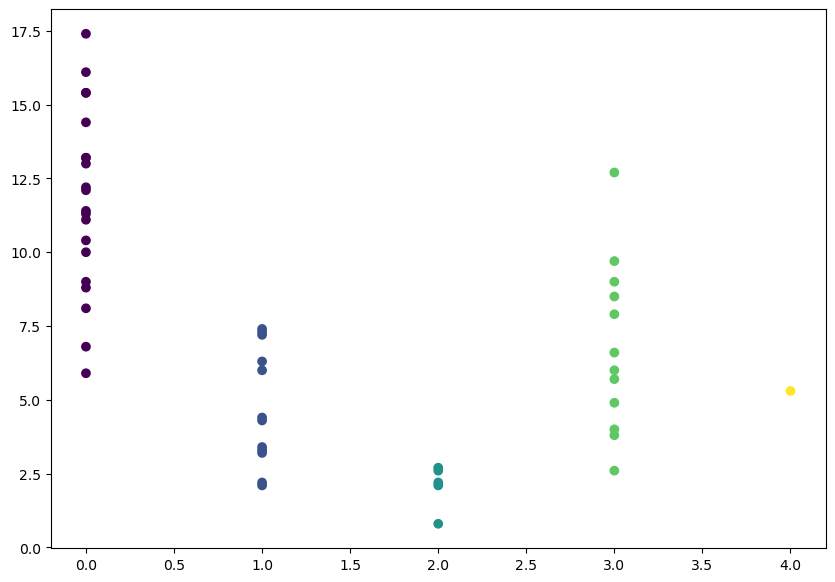

In [11]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['Murder'], c=hclusters.labels_)

In [12]:
 from sklearn.cluster import KMeans

In [13]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

C:\Users\amind\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


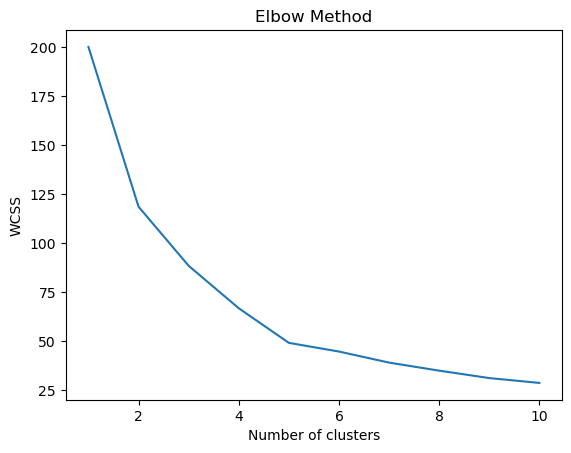

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [16]:
clusters_new.labels_

array([2, 2, 0, 2, 0, 3, 3, 2, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 1, 1, 2])

In [17]:
## Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [18]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.297184  ,  0.94708922,  1.24040403, -0.98574265],
       [-1.11783581, -0.93954982, -0.97657842,  0.72646543],
       [ 0.80731607, -0.70383517,  0.13381084, -0.98574265],
       [-0.35430984,  0.67250186,  0.00352729,  0.60416485]])

In [19]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,0,11.222222,277.777778,79.111111,32.733333,0.000000
1,1,3.600000,78.538462,52.076923,12.176923,2.153846
2,2,12.200000,237.363636,55.454545,22.472727,0.000000
3,3,6.317647,141.529412,75.176471,21.264706,2.000000


In [20]:
data

,Murder,Assault,UrbanPop,Rape,clustersid,clusterid_new
0,13.2,236,58,21.2,0,2
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,0,0
3,8.8,190,50,19.5,0,2
4,9.0,276,91,40.6,0,0
5,7.9,204,78,38.7,3,3
6,3.3,110,77,11.1,1,3
7,5.9,238,72,15.8,0,2
8,15.4,335,80,31.9,0,0
9,17.4,211,60,25.8,0,2


In [21]:
# DB Scan
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
array = data.values

In [23]:
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   0. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   2. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   0. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   2. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ,   0. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   4. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   0. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   1. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   1. ,   1. ],
       [ 11.3, 300. ,  67. ,  2

In [24]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.98574265,
         0.25128536],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.98574265,
         0.25128536],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.98574265,
        -1.54361004],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.98574265,
         0.25128536],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.98574265,
        -1.54361004],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.3991186 ,
         1.14873305],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.1907889 ,
         1.14873305],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.98574265,
         0.25128536],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.98574265,
        -1.54361004],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.98574265,
         0.25128536],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [30]:
 # DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [28]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(data)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.98574265,
         0.25128536],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.98574265,
         0.25128536],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.98574265,
        -1.54361004],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.98574265,
         0.25128536],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.98574265,
        -1.54361004],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.3991186 ,
         1.14873305],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.1907889 ,
         1.14873305],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.98574265,
         0.25128536],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.98574265,
        -1.54361004],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.98574265,
         0.25128536],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [31]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  4, -1,  1,  2,  1,  4,
        0,  2, -1,  3, -1,  2, -1, -1,  4, -1, -1,  2,  3, -1, -1, -1,  2,
        1, -1, -1,  1,  3,  0,  4,  0, -1,  3, -1, -1, -1,  4,  2, -1],
      dtype=int64)

In [32]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [33]:
pd.concat([data,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,clustersid,clusterid_new,cluster
0,13.2,236,58,21.2,0,2,0
1,10.0,263,48,44.5,0,2,-1
2,8.1,294,80,31.0,0,0,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,0,0,-1
5,7.9,204,78,38.7,3,3,-1
6,3.3,110,77,11.1,1,3,1
7,5.9,238,72,15.8,0,2,-1
8,15.4,335,80,31.9,0,0,-1
9,17.4,211,60,25.8,0,2,-1
